## Segmentación

Segmentación, significa agrupar similares entidades juntas. Esto significa que "los grupos son homogeneos".

¿Qué entidades se pueden segmentar? Se pueden segmentar clientes, productos, ofertas, vehiculos, frutas, animales, países, etc. Si se pueden expresar, con data, las propiedades de una entidad, se pueden usar para comparar esa entidad con otras entidades y segmentarla.

Si estamos agrupando clientes basadonos en la frecuencia de compra de un producto puede ser que aspectos como el género no sea relevantes para el análisis. Es por eso que seleccionar los atributos relevantes es un aspecto crítico.

Los pasos clave para realizar una segmentación de los clientes es:

1. Elegir los atributos relevantes de las entidades
2. Agrupar las entidades
3. Entender y describir la segmentación

### EDA

Tenemos los datos de un negocio 'X' que busca entender mejor a sus clientes y rediseñar las ofertas existentes y su comunicación de marketing para mejorar las ventas en un área geográfica.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/Mall_Customers.csv', index_col=0)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
data.rename({'Annual Income (k$)': 'Income', 'Spending Score (1-100)':'Spend Score'}, axis=1, inplace=True)

In [ ]:
data.head()

,Gender,Age,Income,Spend Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
data.describe()

,Age,Income,Spend Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
X = data.iloc[:, [2, 3]].values

`KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)`

- `n_clusters`: es el número de clústeres. Esto nos va a permitir cómo varía el rendimiento del algoritmo con diferentes cantidades de clústeres.
- `init="k-means++"`: método de inicialización de los centroides. Es una estrategia avanzada para seleccionar los centroides iniciales de manera que se favorezca la convergencia y se mejore la calidad de los clústeres finales.
- `max_iter`: número máximo de iteraciones para una sola ejecución del algoritmo. Si el algoritmo alcanza este límite sin converger, se detiene.
- `n_init`: número de veces que el algoritmo se ejecutará con diferentes centroides iniciales. El resultado final será el mejor resultado de estas ejecuciones en términos de inercia

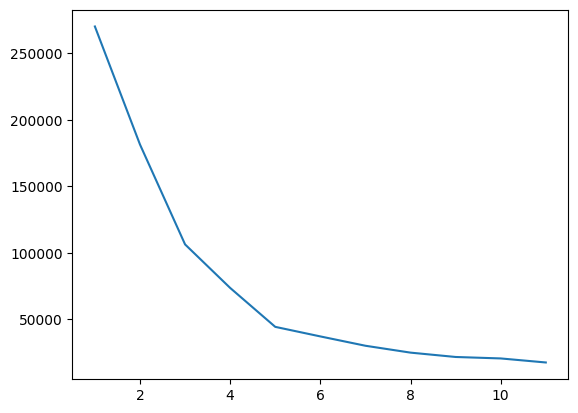

In [ ]:
from sklearn.cluster import KMeans
y = []

for i in range(1, 12):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  y.append(kmeans.inertia_)
plt.plot(range(1, 12), y)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

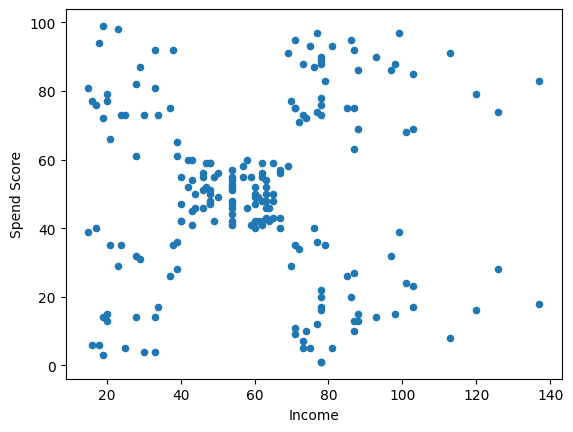

In [ ]:
data.plot.scatter(x='Income', y='Spend Score')
plt.show()

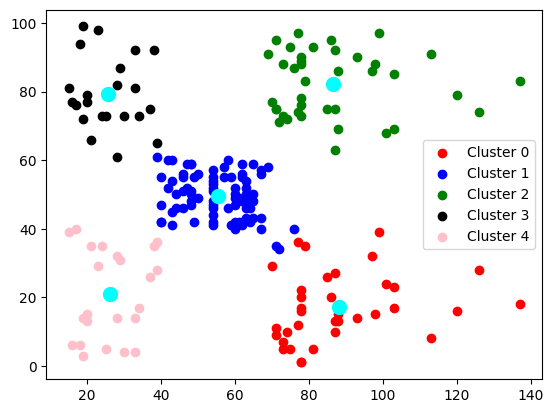

In [ ]:
col = ['red', 'blue', 'green', 'black', 'pink']
for clust in range(5):
  plt.scatter(X[y_kmeans == clust, 0], X[y_kmeans == clust, 1], c=col[clust], label=f"Cluster {clust}")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan')
plt.legend()
plt.show()

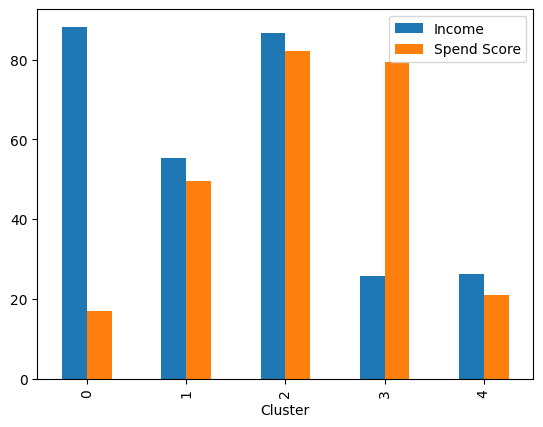

In [ ]:
data['Cluster'] = y_kmeans
data.groupby('Cluster')[['Income', 'Spend Score']].mean().plot.bar()
plt.show()